<img style="float: left; margin: 30px 15px 15px 15px;" src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" width="400" height="600" /> 
    
    
##  Backtesting Dinámico
    
###  Portafolios de Inversión

    Mtro. Sean Nicolás González Vázquez

---

###  1.- Definiciones
    


En la clase de hoy, vamos a consolidar los conceptos que hemos trabajado en sesiones anteriores, poniendo el foco en tres aspectos fundamentales: el **rebalanceo**, el **backtesting estático** y el **backtesting dinámico**.

#### **Rebalanceo**
+ Proceso mediante el cual se ajustan las ponderaciones de los activos dentro de un portafolio.
  
  
  
+ Conforme los precios de los activos varían con el tiempo, las ponderaciones iniciales pueden desviarse significativamente del objetivo establecido.       
  
  
  
+ Este desajuste puede modificar el perfil de riesgo del portafolio, por lo que el rebalanceo tiene como fin restaurar la composición deseada y asegurar que el portafolio continúe alineado con la estrategia de inversión.   
  
  
+ El proceso de rebalanceo puede ser utilizado para retornar un portafolio a sus ponderaciones originales o bien, cambiar a unas nuevas ponderaciones objetivo mediante la reoptimización del portafolio, utilizando la ventana de datos más reciente.  



#### **Static Backtesting**

+ Técnica que nos permite simular el comportamiento de una estrategia de inversión utilizando datos históricos.
  
  
+ En este enfoque, la estrategia se implementa al inicio de un periodo y se mantiene sin cambios hasta el final del mismo. Es decir, no se realizan rebalanceos durante la simulación, lo que implica que el portafolio no se ajusta a las fluctuaciones de mercado.   


+ Aunque este método simplifica el análisis, es poco representativo de la realidad, ya que en la práctica, los portafolios suelen ser ajustados periódicamente para mitigar riesgos o aprovechar oportunidades.

#### Dynamic Backtesting
+ Evolución del enfoque estático, ya que incorpora el proceso de rebalanceo en la simulación. Aquí, no solo evaluamos la estrategia inicial, sino también el impacto de los ajustes periódicos que realizamos en la composición del portafolio a lo largo del tiempo.   
  
  

+ El rebalanceo de un portafolio se realiza de forma sistemática, en intervalos predefinidos, generalmente cada 3, 6 o 12 meses.   
  
  


+ Si se rebalancea con demasiada frecuencia, los costos de transacción pueden reducir las ganancias, mientras que un rebalanceo poco frecuente puede dejar al portafolio expuesto a desviaciones significativas respecto a su estrategia original.
  
  

+ Se recomienda realizar la re-optimización de los pesos del portafolio en cada período, utilizando la ventana de datos más reciente. Esto, la vuelve una estrategia de inversión activa al 100%. 
  
  
+ Este enfoque es más realista porque refleja cómo las decisiones activas del gestor afectan el desempeño bajo diferentes condiciones de mercado. 



---

###  2.- Metodología
    

Para implementar el backtesting dinámico en Python, puedes programar los pasos que se muestran a continuación.

#### 1. Descarga de Datos

    Obtener los precios de cierre ajustado en el horizonte temporal recomendado para la estrategia.
    


#### 2. Definir  la ventana de rebalanceo

      Definir la periodicidad "n" del rebalanceo:
          
          Si se define de manera trimestral (por Q') habrá cuatro rebalanceos por año.
          Si se define semestral, habrá dos rebalanceos al año.
          Si se define de manera anual, habrá uno.
     
     
#### 3. Partición de la base de datos
       
       Particionar la base de datos de acuerdo a las "n" ventanas de rebalanceo por año y los "m" años de 
       tiempo disponible.
       
       Tendremos "mxn" subsets -particiones- del mismo data frame.

#### 4. Backtesting
      
      Optimiza los pesos utilizando la primera ventana de tiempo t0.
      
      Simula el rendimiento del portafolio para el período posterior, es decir, de t1 a t2. 
      
      Una vez que finaliza esta ventana, optimiza nuevamente los pesos utilizando datos de t1 a t2 y simula 
      de t2 a t3. 
      
      Repite este proceso de manera iterativa hasta la simulación para el período final, de tn−1 a tn.
      
      Guarda el histórico con la evolución (simulación) del portafolio.
      

#### 5. **Visualización de resultados**

       Grafica la evolución para comparar el rendimiento de la estrategia a lo largo del tiempo.
       
#### 6. Métricas de Desempeño
        
        Con la evolución histórica del portafolio, obtén las métricas de desempeño.
        
        Analiza las métricas de desempeño y selecciona una estrategia de inversión.
        
        El backtesting dinámico, también nos ayuda a seleccionar la ventana de rebalanceo "óptima" para 
        una estrategia dada.


#### 7. Selección de Estrategia de Inversión

        En base a los resultados, se selecciona una estrategia de inversión y una periodicidad de rebalanceo.
        
        Se obtienen las ponderaciones que se utilizarán para invertir, tomando la última ventana disponible.


####       
    
La gráfica que se muestra a continuación, es una representación gráfica de la metodología para implementar un backtesting dinámico. A través de esta visualización, podemos observar la lógica de la reoptimización y simulación de la estrategia de inversión, incluyendo rebalanceos periódicos dentro de la misma. 


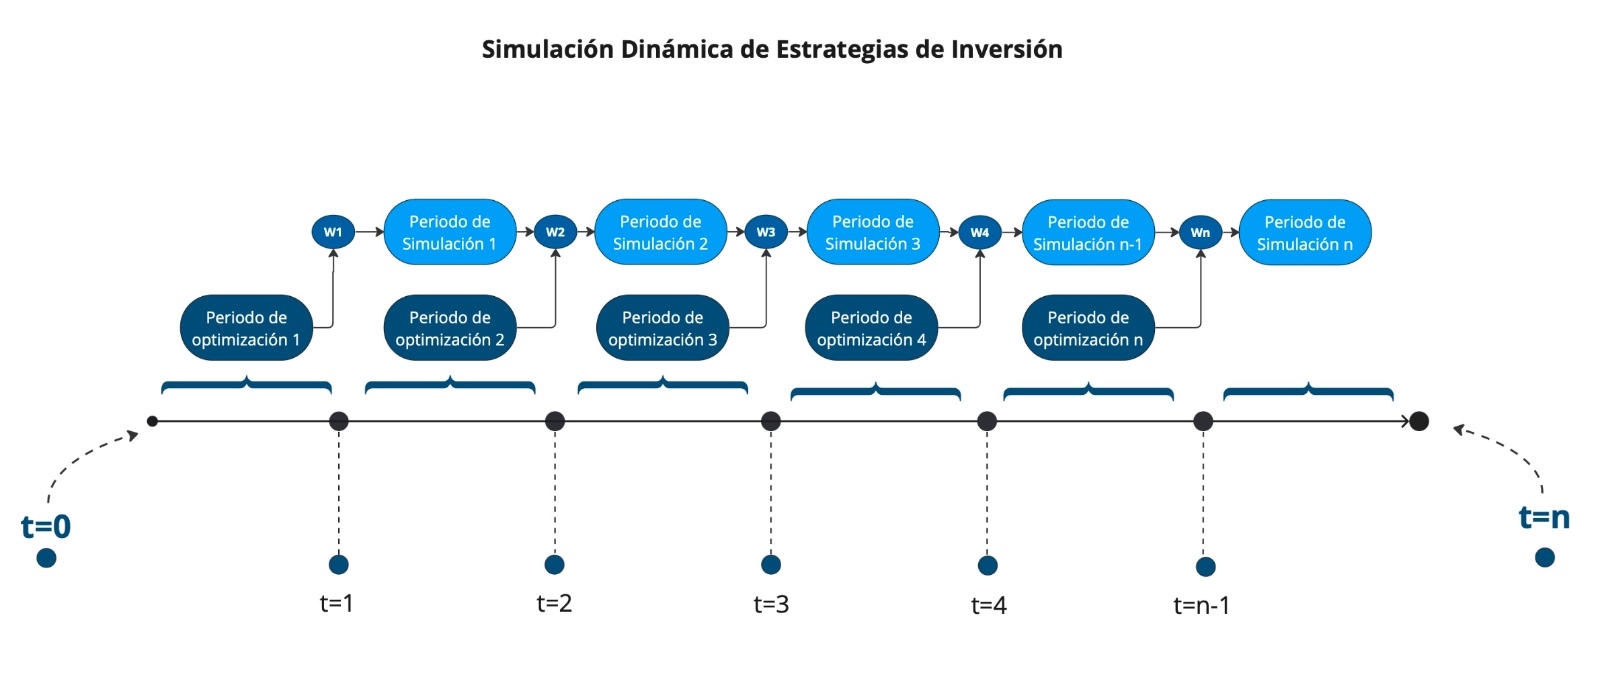

        
A diferencia del backtesting estático, el backtesting dinámico permite ajustar los pesos del portafolio periódicamente para reflejar mejor lo que ocurrió en el mercado. Este proceso es clave en estrategias de inversión activa, ya que los rebalanceos  permiten optimizar el portafolio con el tiempo, respondiendo a nuevas oportunidades o riesgos.

---

###  3.- Implementación 
    
  


In [3]:
# importacion de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import yfinance as yf

#### Descarga de Datos




In [ ]:
# Descarga de Datos
prices=yf.download(['AAPL', 'MSFT', 'GOOG', 'JPM'], start='2020-01-01', end='2025-07-01')['Close']

benchmark=yf.download(['^GSPC'], start='2020-01-01', end='2025-07-01')['Close']


[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed


Ticker,^GSPC
Date,
2018-01-02,2695.810059
2018-01-03,2713.060059
2018-01-04,2723.989990
2018-01-05,2743.149902
2018-01-08,2747.709961
...,...
2025-06-24,6092.180176
2025-06-25,6092.160156
2025-06-26,6141.020020


#### Clase para Optimizar Pesos

In [5]:
# Optimize Weights Class
class OptimizePortfolioWeights:

    def __init__(self, returns: pd.DataFrame, risk_free: float):

        self.rets = returns
        self.cov = returns.cov()
        self.rf = risk_free / 252
        self.n_stocks = len(returns.columns)
    
    # Min Variance
    def opt_min_var(self):
    

        var = lambda w: w.T @ self.cov @ w

        w0=np.ones(self.n_stocks)/self.n_stocks

        bounds=[(0, 1)]*self.n_stocks

        constraint=lambda w: sum(w)-1

        result=minimize(fun=var, x0=w0, bounds=bounds, 
                        constraints={'fun': constraint, 'type': 'eq'}, 
                        tol=1e-16)

        return result.x
    
    # Sharpe Ratio
    def opt_max_sharpe(self):
        rets = self.rets
        rend, cov, rf = self.rets.mean(), self.cov, self.rf

        sr = lambda w: -((np.dot(rend, w) - rf) / ((w.reshape(-1, 1).T @ cov @ w) ** 0.5))

        result = minimize(sr, np.ones(len(rets.T)), bounds=[(0, None)] * len(rets.T),
                          constraints={'fun': lambda w: sum(w) - 1, 'type': 'eq'},
                          tol=1e-16)

        return result.x
    
    # Semivariance method
    def opt_min_semivar(self, rets_benchmark):
    
        rets, corr=self.rets.copy(), self.rets.corr()

        diffs=rets-rets_benchmark.values
        
        below_zero_target=diffs[diffs<0].fillna(0)
        target_downside=np.array(below_zero_target.std())

        target_semivariance=np.multiply(target_downside.reshape(len(target_downside), 1), target_downside) * corr
        
        semivar = lambda w: w.T @ target_semivariance @ w

        w0=np.ones(self.n_stocks)/self.n_stocks

        bounds=[(0, 3)]*self.n_stocks

        constraint=lambda w: sum(w)-1

        result=minimize(fun=semivar, x0=w0, bounds=bounds, 
                        constraints={'fun': constraint, 'type': 'eq'}, tol=1e-16)

        return result.x
    
    # Omega 
    def opt_max_omega(self, rets_benchmark):
    
        rets=self.rets.copy()

        diffs=rets-rets_benchmark.values
        
        below_zero_target=diffs[diffs<0].fillna(0)
        above_zero_target=diffs[diffs>0].fillna(0)

        target_downside=np.array(below_zero_target.std())
        target_upside=np.array(above_zero_target.std())
        o=target_upside/target_downside

        omega = lambda w: -sum(o * w)


        w0=np.ones(self.n_stocks)/self.n_stocks

        bounds=[(0, 3)]*self.n_stocks

        constraint=lambda w: sum(w)-1

        result=minimize(fun=omega, x0=w0, bounds=bounds,
                        constraints={'fun': constraint, 'type': 'eq'}, tol=1e-16)

        return result.x


#### ¿Como implementar una clase?

In [6]:
returns = prices.pct_change().dropna()
optimize_port = OptimizePortfolioWeights(returns, 0.035)


In [7]:
optimize_port.opt_min_var()

array([0.14722386, 0.16428097, 0.41511212, 0.27338305])

In [8]:
optimize_port.opt_max_sharpe()

array([1.68072622e-01, 5.50323493e-17, 1.88795045e-01, 6.43132332e-01])

In [9]:
rets_bench = benchmark.pct_change().dropna()

In [10]:
optimize_port.opt_min_semivar(rets_bench)

array([0.09175497, 0.        , 0.31235379, 0.59589124])

In [11]:
optimize_port.opt_max_omega(rets_bench)

array([1.31546875e-15, 3.81957775e-16, 1.00000000e+00, 4.93581049e-16])

#### Clase backtesting dinámico

In [12]:
# Clase pre-definida

class dynamic_backtesting:
    
    # Definir las variables que necesitamos dentro de todas las funciones
    def __init__(self, prices, prices_benchmark, capital, rf, months):
        self.prices = prices # Atributo para los precios que se almacena en self 
        self.prices_benchmark=prices_benchmark # Atributo para los precios del benchmark que se almacena en self 
        self.months = months # Atributo para los meses que se almacena en self 
        self.capital = capital # Atributos para el capital que se almacena en self 
        self.rf = rf  # Atributa de tasa libre riesgo que se almacena en self 
        


# self es el objeto donde se almacenan los atributos

    # Clase para optimizar los pesos
    def optimize_weights(self, prices: pd.DataFrame, n_days: int, periods: int):
        
        temp_data = prices.iloc[int(n_days * periods):int(n_days * (periods + 1)), :]   # Extrae el subconjunto de precios actual para el periodo de optimización
        
        temp_bench = self.prices_benchmark.copy().iloc[int(n_days * periods):int(n_days * (periods + 1)), :]    #Extrae el subconjunto de precios del benchmark para el periodo de optimización

        temp_rets = temp_data.pct_change().dropna()  # Calcula los rendimientientos del periodo de optimización
        rets_benchmark = temp_bench.pct_change().dropna() # Calcula los rendimientos del benchmark para el periodo de optimización

        
        optimizer = OptimizePortfolioWeights(returns=temp_rets, risk_free=self.rf)  # Se utiliza la clase anterior que contiene los rendimientos del periodo de optimización y contiene el atributo de la tasa libre de riesgo
        w_minvar=optimizer.opt_min_var()
        w_sharpe=optimizer.opt_max_sharpe()
        w_semivar=optimizer.opt_min_semivar(rets_benchmark)
        w_omega=optimizer.opt_max_omega(rets_benchmark)
        # Se obtienen los pesos de cada uno de los métodos de optimización

        return w_minvar, w_sharpe, w_semivar, w_omega # Se devuelven los pesos de los metodos de optimización

    def simulation(self): # Se utiliza el objeto de almacenimiento de los atributos para realizar la simulación de bt
        
        n_days = round(len(self.prices) / round(len(self.prices) / 252 / (self.months / 12)), 0) # Son los días redondeados a 0 decimales , son los numero de dias del periodo de la simulación/bt
        
        capital = self.capital  # Es el capital inicial de la simulación/bt
             
        opt_data = self.prices.copy().iloc[:int(n_days), :]    # Se hace una copia de los precios y se extrae el subconjunto de los precios para el period de optimización
        
        backtesting_data = self.prices.copy().iloc[int(n_days):, :] # Se hace una copia de los precios y se extrae el subconjunto de los precios para el periodo de simulación/bt
        
        backtesting_rets = backtesting_data.pct_change().dropna() # Se calculan los rendimientos del periodo de simulación/bt
        
        backtesting_bench =self.prices_benchmark.copy().iloc[int(n_days):, :].pct_change().dropna() # Se hace una copia de los precios de benchmark y se extrae el subconjunto de los precios para el periodo y se calculan los rendimientos 
        
        day_counter, periods_counter = 0, 0 # Se inicializa los contadores de los días y de los periodos 
        
        minvar, sharpe, semivar, omega = [capital], [capital], [capital], [capital] # Lista para almacenar el capital a lo largo del tiempo para estrategia 
        
        w_minvar, w_sharpe, w_semivar, w_omega = self.optimize_weights(opt_data, n_days, 0) # Se obtienne los pesos optimizados
        
        for day in range(len(backtesting_data) - 1): # Se itera dia a dia para 
            
            
            if day_counter < n_days: # Si el contador de dias es menor al numero de didas de optmización , hace : 

                sharpe.append(sharpe[-1] * (1 + sum(backtesting_rets.iloc[day, :] * w_sharpe)))  
                minvar.append(minvar[-1] * (1 + sum(backtesting_rets.iloc[day, :] * w_minvar)))
                semivar.append(semivar[-1] * (1 + sum(backtesting_rets.iloc[day, :] * w_semivar)))
                omega.append(omega[-1] * (1 + sum(backtesting_rets.iloc[day, :] * w_omega)))

            else:
                
                w_minvar, w_sharpe, w_semivar, w_omega = self.optimize_weights(backtesting_data, n_days, periods_counter)
                    
                sharpe.append(sharpe[-1] * (1 + sum(backtesting_rets.iloc[day, :] * w_sharpe)))
                minvar.append(minvar[-1] * (1 + sum(backtesting_rets.iloc[day, :] * w_minvar)))
                semivar.append(semivar[-1] * (1 + sum(backtesting_rets.iloc[day, :] * w_semivar)))
                omega.append(omega[-1] * (1 + sum(backtesting_rets.iloc[day, :] * w_omega)))
                
                periods_counter += 1
                day_counter = 0

            day_counter += 1
        
        df = pd.DataFrame()
        df['Date'] = backtesting_data.index
        df['Date'] = pd.to_datetime(df['Date'])
        df['Min Var'] = minvar
        df['Sharpe'] = sharpe
        df['Semivar'] = semivar
        df['Omega'] = omega
        df.set_index('Date', inplace=True)

        return df



#### Backtesting
      
     

In [13]:
history=dynamic_backtesting(prices, benchmark, capital=1000000, rf=.035, months=12).simulation()

#### **Visualización de resultados**



In [14]:
history

,Min Var,Sharpe,Semivar,Omega
Date,,,,
2019-01-29,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
2019-01-30,1.014673e+06,1.033418e+06,1.015261e+06,1.033418e+06
2019-01-31,1.010514e+06,1.014475e+06,1.002347e+06,1.014475e+06
2019-02-01,1.012407e+06,9.984457e+05,9.978994e+05,9.984457e+05
2019-02-04,1.021752e+06,1.027200e+06,1.011942e+06,1.027200e+06
...,...,...,...,...
2025-06-24,4.536243e+06,6.352851e+06,4.614834e+06,3.456969e+06
2025-06-25,4.574933e+06,6.429121e+06,4.657793e+06,3.472204e+06
2025-06-26,4.622604e+06,6.531042e+06,4.705743e+06,3.508742e+06


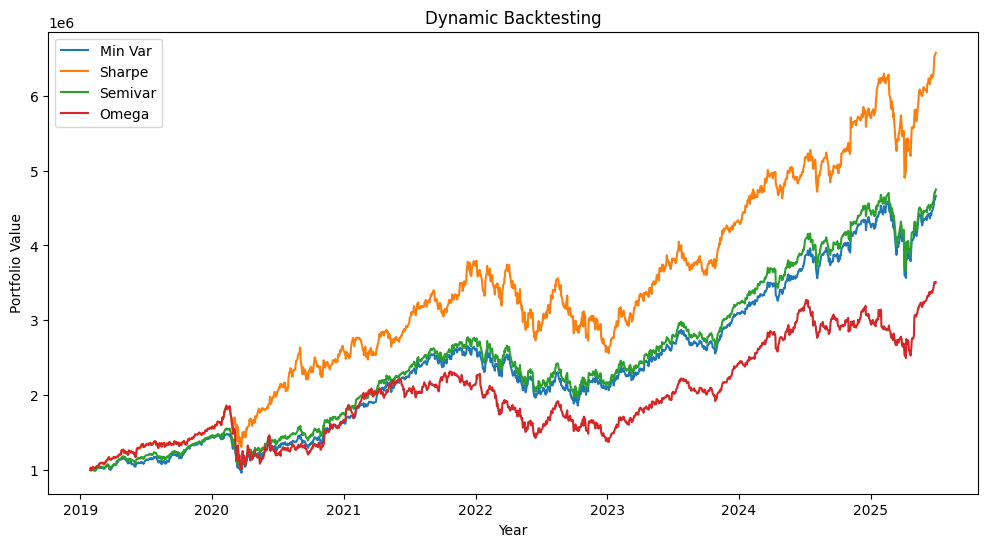

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(history, label=history.columns)
plt.title('Dynamic Backtesting')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Portfolio Value')
plt.show()

#### Métricas de Desempeño

In [16]:
def get_metrics(history, rf):

    daily_rets=history.pct_change().dropna()

    rend_prom=daily_rets.mean()*252 
    std__=daily_rets.std()*np.sqrt(252) 
    RS=(rend_prom-rf)/std__
    downside=daily_rets[daily_rets<0].fillna(0).std()*np.sqrt(252) 
    upside=daily_rets[daily_rets>0].fillna(0).std()*np.sqrt(252) 
    Omega=upside/downside 
    Sortino=(rend_prom-rf)/downside


    metrics=pd.DataFrame([rend_prom, std__, RS, downside, upside, Omega, Sortino], 
                         index=['Rend', 'Vol', 'Sharpe', 'Downside', 'Upside', 'Omega', 'Sortino'])
    return metrics

get_metrics(history, .035)

,Min Var,Sharpe,Semivar,Omega
Rend,0.272998,0.333261,0.274960,0.244969
Vol,0.254736,0.279009,0.250878,0.312815
Sharpe,0.934293,1.069003,0.956481,0.671224
Downside,0.155958,0.168350,0.154175,0.189902
Upside,0.162722,0.175865,0.159555,0.201011
Omega,1.043369,1.044637,1.034890,1.058503
Sortino,1.526034,1.771670,1.556412,1.105673


#### Selección de Estrategia de Inversión

### ???

---

###  4.- Reflexión: Consideraciones del Backtesting Dinámico
    

- **Simulación más realista del comportamiento del portafolio:**  

  - A diferencia del backtesting estático, donde los pesos de los activos permanecen fijos, el backtesting dinámico permite ajustar la composición del portafolio en intervalos regulares, imitando las decisiones de una gestión activa de portafolios.  
  
 
- **Reoptimización de la estrategia:**
  - Al reoptimizar, se mantiene el portafolio en línea con las metas originales de rendimiento y riesgo, lo que puede generar retornos más consistentes a largo plazo, al ajustar el portafolio a medida que los mercados evolucionan.  
  

  
- **Gestión del riesgo:**
  - El rebalanceo permite ajustar la exposición a los activos para reducir riesgos asociados con la concentración en ciertos sectores o activos, reaccionando a cambios en la volatilidad histórica o en las correlaciones históricas entre activos.
  - Permite mantener un portafolio más diversificado y alineado con los objetivos de riesgo del inversor, en base a la estrategia predefinida.  
  

- **Costo computacional**
  - El backtesting estático es más simple y menos costoso de implementar, pero no captura las decisiones activas de ajuste ni las implicaciones de la evolución del mercado.  
  - El backtesting dinámico requiere mayor capacidad computacional debido a la necesidad de recalcular los pesos de los activos en cada punto de rebalanceo, lo que incrementa tanto el tiempo de ejecución como los recursos necesarios.
  - Adicionalmente, al implementar estas simulaciones en Python (u otros lenguajes), es importante optimizar el código para manejar grandes cantidades de datos de manera eficiente.
    
    
- **Sistematización del rebalanceo**
    - Al implementar el backtesting dinámico, podemos optimizar el horizonte de rebalanceo, lo que nos permite determinar con precisión la frecuencia adecuada para ajustar un portafolio en la realidad.  
    - En una estrategia de inversión, es crucial seguir estrictamente la frecuencia de rebalanceo definida. Esto significa que, si se ha establecido rebalancear cada "x" meses, debemos hacerlo de manera sistemática, sin dejar que expectativas de ganancias adicionales o posibles pérdidas influyan en la decisión. 